In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Data Cleaning
**Replace zero values with median for features like Glucose, BMI, etc.**


In [5]:
zero_counts=(data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]==0).sum()

In [6]:
zero_counts

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [7]:
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[column] = data[column].replace(0, data[column][data[column] != 0].median())

In [8]:
zero_counts = (data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum()

In [9]:
zero_counts

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

### Exploratory Data Analysis
**Visualize feature distributions and correlations.**

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

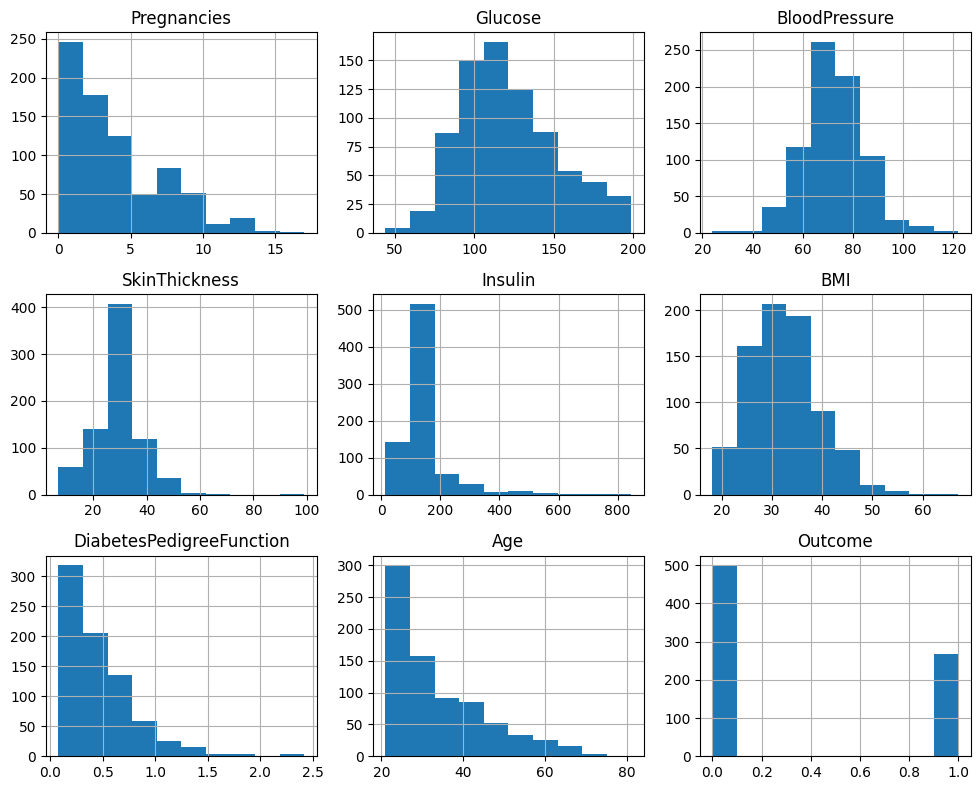

In [11]:
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

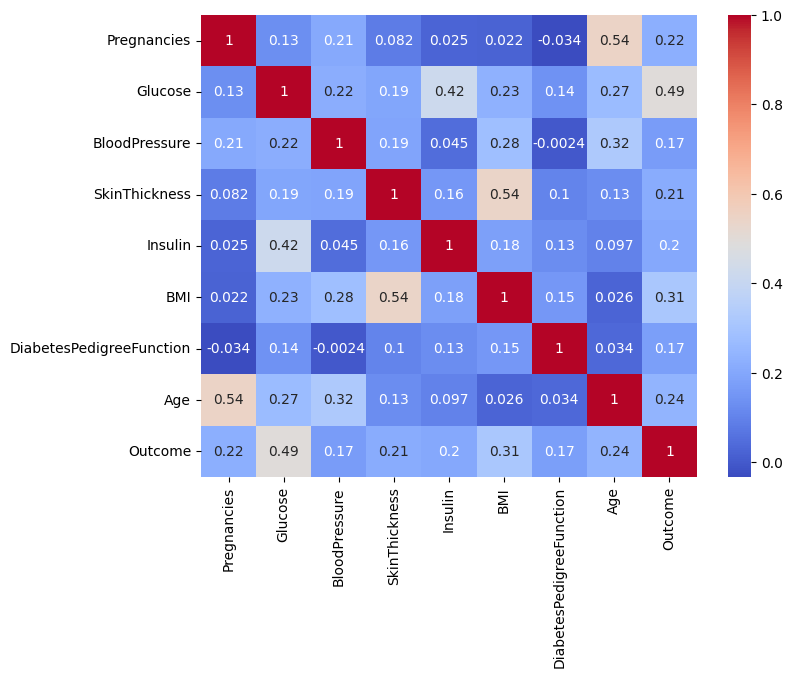

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

### Logistic Regression Model
**Train and evaluate the model.**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [14]:
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

### Model Results
**The logistic regression model achieved an accuracy of **75.32%** on the test set.**

In [19]:
accuracy # Model accuracy: 75.32%

0.7532467532467533

### Classification Report
**Show precision, recall, and f1-score.**

In [20]:
from sklearn.metrics import classification_report

In [21]:
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)

In [22]:
report

'              precision    recall  f1-score   support\n\n           0       0.80      0.83      0.81        99\n           1       0.67      0.62      0.64        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.72      0.73       154\nweighted avg       0.75      0.75      0.75       154\n'

### Confusion Matrix
**Visualize model errors.**

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

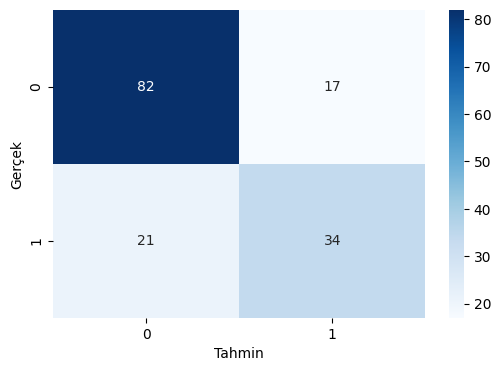

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.show()